In [1]:
import itertools
from context import bowman
from bowman.triangulation import Triangulation
from bowman.point_orbits import *

In [2]:
ronen44 = Triangulation.ronen_l(44)
veech_gens_list = ronen44.generators_veech.gens
#veech_elem = veech_gens_list[2] * veech_gens_list[0]
#veech_elem = veech_elem**2
veech_elem = veech_gens_list[12]
veech_elem

[     -a - 5   -2*a - 11]
[-5/22*a - 1  -1/2*a - 2]

## Computing periodic points
We use the surface and veech group obtained above, along with the particular veech element, to compute the candidate periodic points, and then the periodic points.

In [9]:
# so input set of candidate points is a set of points of form (i, (x1, x2, x3)) for triangle i
# and candidate point (x1, x2, x3) on that triangle.

candidate_points = set()

for i in range(len(ronen44.triangles)):
    tri_points = ronen44.compute_candidate_periodic_points(i, veech_gens_list, veech_elem)
    for point in tri_points:
        reformatted = (i, point)
        candidate_points.add(reformatted)

Completed triangulation.
Number of lines to eliminate: 4.
Lines:
((1/2, 0, 1/2), (1, 0, 0))
((1/2, 1/4, 1/4), (1, 0, 0))
((1/2, 0, 1/2), (0, 0, 1))
((1/2, 1/4, 1/4), (0, 1/2, 1/2))
Applying [     -a - 5   -2*a - 11]
[-5/22*a - 1  -1/2*a - 2]...
Completed triangulation.
Completed triangulation.
Number of lines to eliminate: 4.
Lines:
((1/2, 0, 1/2), (1, 0, 0))
((1/2, 1/4, 1/4), (1, 0, 0))
((1/2, 1/4, 1/4), (0, 1/2, 1/2))
((1/2, 0, 1/2), (0, 0, 1))
Applying [     -a - 5   -2*a - 11]
[-5/22*a - 1  -1/2*a - 2]...
Completed triangulation.
Completed triangulation.
Number of lines to eliminate: 4.
Lines:
((1/2, 0, 1/2), (1, 0, 0))
((1/2, 1/4, 1/4), (1, 0, 0))
((1/2, 0, 1/2), (0, 0, 1))
((1/2, 1/4, 1/4), (0, 1/2, 1/2))
Applying [     -a - 5   -2*a - 11]
[-5/22*a - 1  -1/2*a - 2]...
Completed triangulation.
Completed triangulation.
Number of lines to eliminate: 2.
Lines:
((1/2, 1/4, 1/4), (1, 0, 0))
((1/2, 1/4, 1/4), (0, 1/2, 1/2))
Applying [     -a - 5   -2*a - 11]
[-5/22*a - 1  -1/2*a - 2]...

In [10]:
# now we run the code to check compute the periodic points
def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

#preserved_pts = points_preserved(ronen44, veech_gens_list[13], candidate_points)
#mark_points(ronen44, preserved_pts).plot().show()
#preserved_pts

In [ ]:
# this block runs the algorithm on all elements of the veech generators list to reduce to periodic points.
preserved_pts = reduce_periodic_points(ronen44, candidate_points, veech_gens_list)
mark_points(ronen44, preserved_pts).plot().show()
mark_points(ronen44, candidate_points).plot().show()
preserved_pts

### Apply just a single veech group element
The following allows for just applying a single element to the candidate points and checking to see what happens.

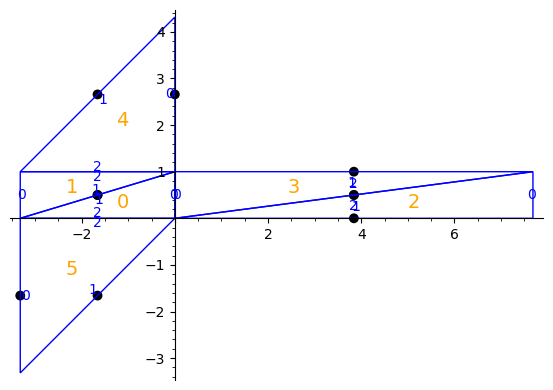

{(0, (0, 1/2, 1/2)),
 (1, (0, 1/2, 1/2)),
 (2, (0, 1/2, 1/2)),
 (2, (1/2, 0, 1/2)),
 (3, (0, 1/2, 1/2)),
 (3, (1/2, 0, 1/2)),
 (4, (0, 1/2, 1/2)),
 (4, (1/2, 1/2, 0)),
 (5, (0, 1/2, 1/2))}

In [43]:
# as can be seen by the following output, it is sufficient to just apply
# a single veech element and get the entire collection of periodic points
preserved_pts = points_preserved(ronen44, veech_gens_list[13], candidate_points)
mark_points(ronen44, preserved_pts).plot().show()
preserved_pts